# Result Analysis

The steps and explanations are in the **code comments**.

In [ ]:
!pip install gdown

import gdown
import zipfile
import os

url = "https://drive.google.com/uc?id=1ASDijv4GiK-otXLjGymbrCwff_UJvfaK"

output_file = "downloaded_file.zip"
gdown.download(url, output_file, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1ASDijv4GiK-otXLjGymbrCwff_UJvfaK
From (redirected): https://drive.google.com/uc?id=1ASDijv4GiK-otXLjGymbrCwff_UJvfaK&confirm=t&uuid=2f68754f-7964-4d50-b2ff-920a00c86b3d
To: /content/downloaded_file.zip
100%|██████████| 1.23G/1.23G [00:13<00:00, 89.6MB/s]


文件解压完成！
解压后的文件:  ['sentiment']


In [ ]:
import os
import pandas as pd

# the folder where the zip file is extracted
folder_path = "extracted_files/sentiment"

# list of dataframes for each CSV file
dataframes = []

# max number of rows to sample from each file
sample_size = 50000

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if file.endswith(".csv"):
        print(f"Reading file: {file}")
        # read a complete CSV file and then sample 50000 rows randomly
        df = pd.read_csv(file_path).sample(n=sample_size, random_state=42)
        dataframes.append(df)


# merge all dataframes into one
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print("Merged df:")
    print(combined_df.head()) 
else:
    print("No csv files found in the folder")



读取文件: 20220227-0302_sentiment.csv


<ipython-input-3-29aa8c3199e3>:18: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).sample(n=sample_size, random_state=42)


读取文件: 20230301-0305_sentiment.csv


<ipython-input-3-29aa8c3199e3>:18: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).sample(n=sample_size, random_state=42)


读取文件: 20221109-1115_sentiment.csv
读取文件: 20220518-0524_sentiment.csv


<ipython-input-3-29aa8c3199e3>:18: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).sample(n=sample_size, random_state=42)


读取文件: 20220623-0701_sentiment.csv


<ipython-input-3-29aa8c3199e3>:18: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).sample(n=sample_size, random_state=42)


读取文件: 20220330-0405_sentiment.csv


<ipython-input-3-29aa8c3199e3>:18: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).sample(n=sample_size, random_state=42)


读取文件: 20220930-1006_sentiment.csv
读取文件: 20230518-0524_sentiment.csv


<ipython-input-3-29aa8c3199e3>:18: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).sample(n=sample_size, random_state=42)


合并后的数据框:
   Unnamed: 0.1  Unnamed: 0      userid        username  \
0        329605     1658270  2592146125        SoxyBill   
1         52665     1215592  3602010316       GirlGiada   
2        365022     1713373  2383088793  StopFakingNews   
3        603675      367975  2273554058          WDMunn   
4        650442      442095  3366493624       DiWalsham   

                                            acctdesc       location  \
0  My Twitter name has nothing to do with so-call...   Arizona, USA   
1  Music, animals, politics, strategy. Tweets are...            NaN   
2  We monitor/ fact-check/debunk Russian disinfor...  Kyiv, Ukraine   
3                    Finding Myself Grown Up #Resist            NaN   
4                                                NaN            NaN   

   following  followers  totaltweets               usercreatedts  ...  \
0        620      244.0        17125  2014-06-27 23:33:15.000000  ...   
1      14692    17783.0        71370  2015-09-09 20:35:32.00000

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0.1             400000 non-null  int64  
 1   Unnamed: 0               400000 non-null  int64  
 2   userid                   400000 non-null  int64  
 3   username                 400000 non-null  object 
 4   acctdesc                 323399 non-null  object 
 5   location                 244894 non-null  object 
 6   following                400000 non-null  int64  
 7   followers                400000 non-null  float64
 8   totaltweets              400000 non-null  int64  
 9   usercreatedts            400000 non-null  object 
 10  tweetid                  400000 non-null  int64  
 11  tweetcreatedts           400000 non-null  object 
 12  retweetcount             400000 non-null  int64  
 13  text                     400000 non-null  object 
 14  hash

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

In [ ]:
combined_df['text']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

## Word Clouds for Each Sentiment

In [ ]:
# create a set of stopwords
stop_words = set(stopwords.words('english') + list(string.punctuation))

# get the sentiment groups
sentiment_groups = combined_df.groupby('sentiment_label')

# dict of word frequency by sentiment
word_freq_by_sentiment = {}

# go through each sentiment group
for sentiment, group in sentiment_groups:
    texts = group['text'].dropna()  # get non-null text
    # split the text into words and convert to lowercase
    all_words = ' '.join(texts).lower().split()
    filtered_words = [word for word in all_words if word not in stop_words]
    # get the frequency of each word
    word_freq = pd.Series(filtered_words).value_counts()
    word_freq_by_sentiment[sentiment] = word_freq

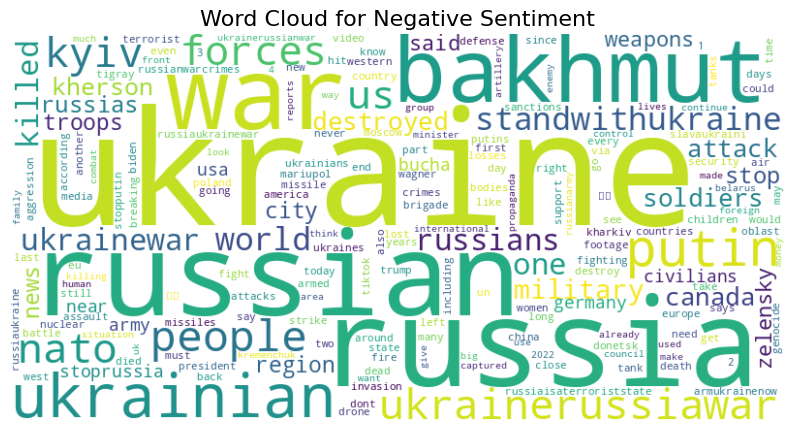

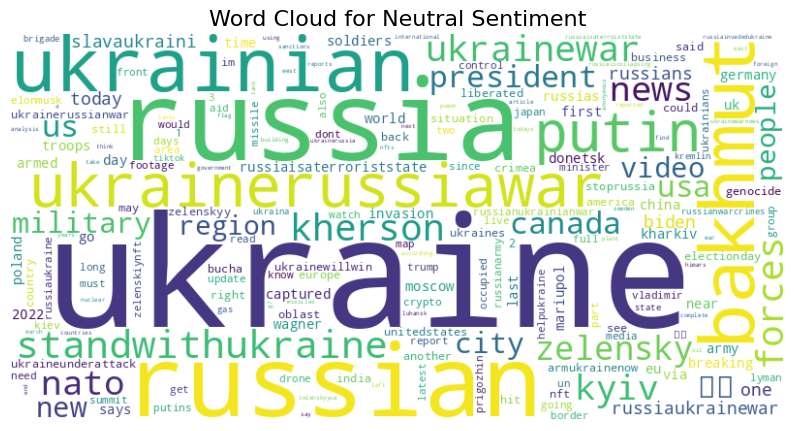

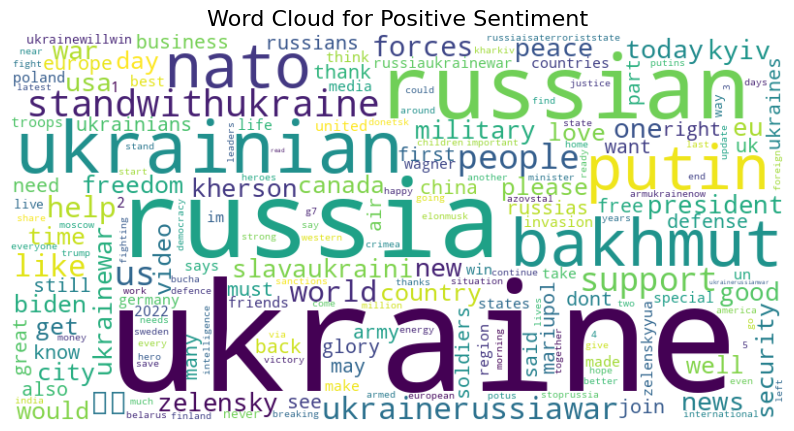

In [ ]:
# draw word cloud for each sentiment
for sentiment, word_freq in word_freq_by_sentiment.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment', fontsize=16)
    plt.show()


## Clustering Texts for Each Sentiment


Cluster 0:
Sample 0: anonymous is continuing its operations against the russian federation our operations are targeting the russian government and those close to the russian government we are at war we are united with ukraine 🇺🇦 mr putin you have been warned expect more
Sample 8: alexanderdecroo klausiohannis stop russian aggression against ukraine nato close the sky over ukraine exclude russia from the un security council stopputin stoprussia
Sample 9: 🕊️peace talks will pave the way for lasting peace💙 is it a civilized culture to sacrifice fellow human beings for war hunger ✊✊ palestine ukrainerussiawar
Sample 11: nikosdendias greecemfa its time for more stingers and javelins for ukraine kgbputin have start the war kgb putin is slaughtering people more weapons for ukrainians are needed equipmentevery weekuntil war is finishukrainian
Sample 16: whitehouse vp potus flotus secondgentleman stop russian aggression against ukraine nato close the sky over ukraine exclude russia from the un

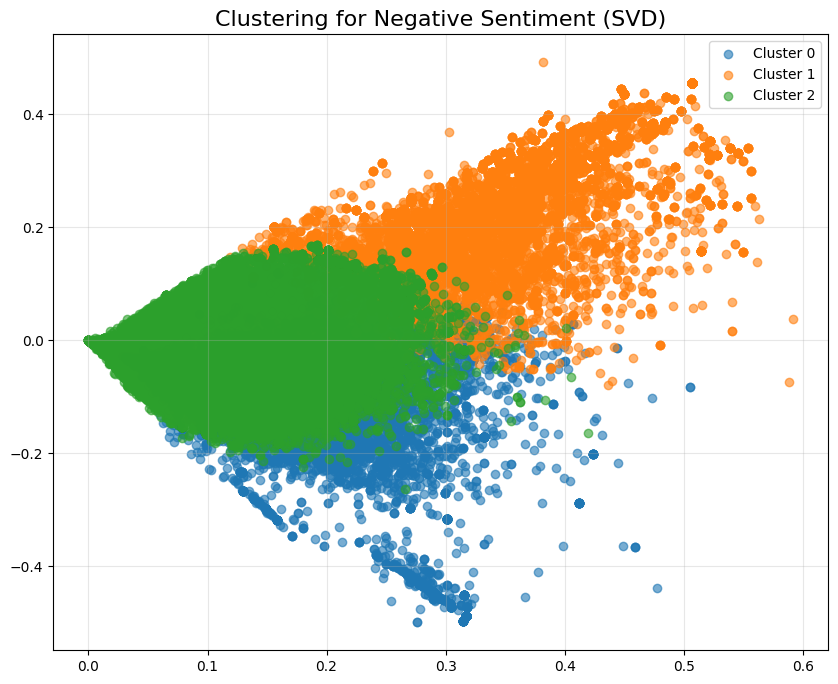


Cluster 0:
Sample 9067: 🗺️bakhmut map of the situation as of march 5 1100 ukrainerussiawar
Sample 9072: bakhmut russia near first major victory in ukrainewar
Sample 9093: ⚡⚡kyiv is going to withdraw some military units from bakhmut artemovsk but most likely this will affect regular troops not mobilized ones pushilins adviser
Sample 9095: how to generate crn at income tax generationbridge adanienterprises supremecourtofindia stockmarketnews bajajfinserv advantageap mtlaairdrop bakhmut g20presidency lpgpricehike etretailscs matrizesurveyrocks hbdhanumanbeniwalji teamrario
Sample 9108: bakhmut through the eyes of eyewitnesses
Top 5 Keywords: standwithrussia, wagner, russia, ukraine, bakhmut

Cluster 1:
Sample 1: gop wait this you gopisafailedparty ukraine goptraitorstodemocracy
Sample 3: 🇺🇸elon muck answered the 🇺🇦mykhailo fedorov standwithukraine starlink elonmusk mykhailofedorov
Sample 4: ⚡elon musks starlink satellites are already working over ukraine according to speedtest download s

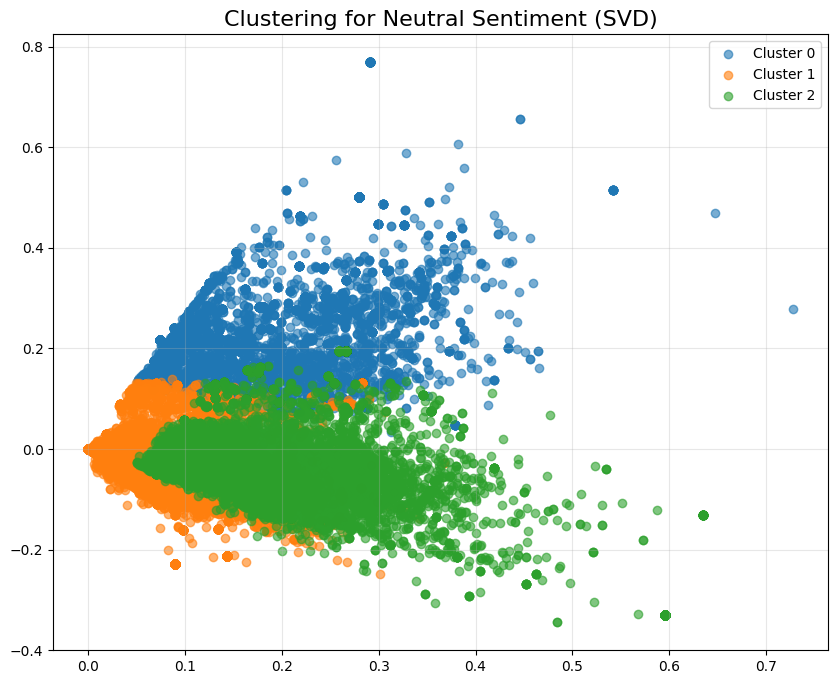


Cluster 0:
Sample 2: 🎬 ukraine join us live to watch this security council meeting 🔗 for es fr ru ar zh 🗓️ 27 feb 2022 | 🕒 300 pm est
Sample 5: listening to the stories of ukrainians fleeing to romanian and moldovan towns like botosani and chisinau i cant help being reminded that that is where my greatgrandparents on both sides lived before fleeing the 19023 pogroms they left via the port of odessa slavaukraini
Sample 9: sattam825 in this video the reporter is talking about climate changes renewable energy reforms of the tax system in austria also for things like that naming the source is quite important like what channel was this supposedly broadcasted on what time etc ukraine russia propaganda
Sample 16: are you a ukrainian seeking asylum in finland first as a ukrainian citizen you have a right to stay in the shengen area incl finland for three months if you want to stay longer you need to apply for a residence permit seeking asylum is one option ukraine 113
Sample 20: putin never f

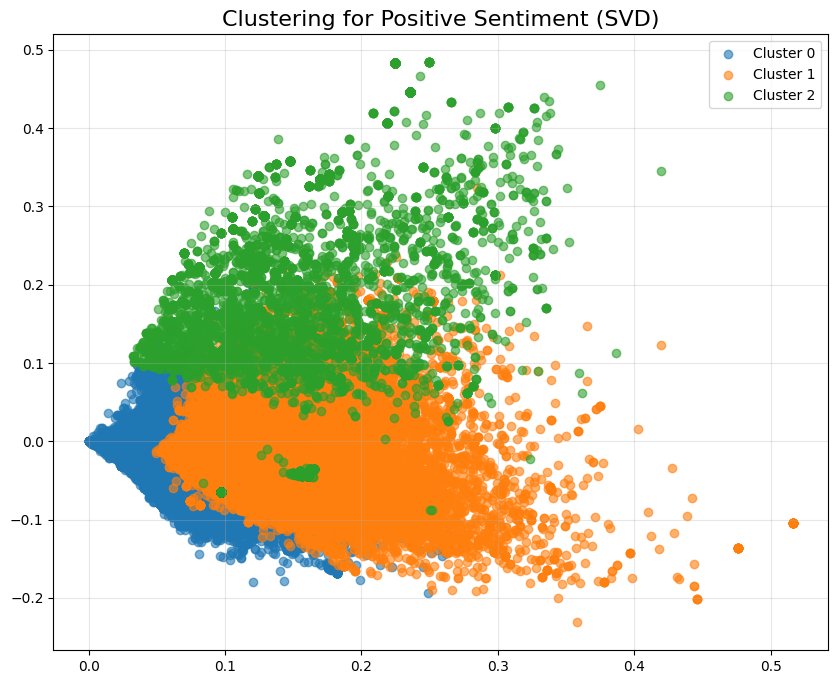

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# cluster each sentiment group
for sentiment, group in sentiment_groups:
    texts = group['text'].dropna()

    # vectorization
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)

    # clustering
    k = 3  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)

    # use TruncatedSVD to reduce the dimensionality for visualization
    svd = TruncatedSVD(n_components=2, random_state=42)
    reduced_data = svd.fit_transform(tfidf_matrix)

    # Visualize
    plt.figure(figsize=(10, 8))
    for cluster in range(k):
        points = reduced_data[kmeans.labels_ == cluster]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

        cluster_indices = [i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == cluster]
        print(f"\nCluster {cluster}:")
        for idx in cluster_indices[:5]: # Display only the first 5 representative texts in each cluster
            print(f"Sample {idx}: {texts.iloc[idx]}")

        # print top keywords for each cluster
        sorted_items = tfidf_matrix[cluster_indices].sum(axis=0).A1
        top_keywords = [vectorizer.get_feature_names_out()[i] for i in sorted_items.argsort()[-5:]]
        print(f"Top 5 Keywords: {', '.join(top_keywords)}")

    plt.title(f'Clustering for {sentiment.capitalize()} Sentiment (SVD)', fontsize=16)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


In [ ]:
combined_df['sentiment_label']

,sentiment_label
0,neutral
1,negative
2,negative
3,neutral
4,negative
...,...
399995,positive
399996,positive
399997,negative
399998,neutral


## Plotting Sentiment Score Over Time

                sentiment_score  negative  neutral  positive
tweetcreatedts                                              
2022-02-27            -0.058682    5224.0   2189.0    4172.0
2022-02-28            -0.094948    5736.0   2427.0    3885.0
2022-03-01            -0.119745    6333.0   2192.0    4061.0
2022-03-02            -0.102094    6824.0   2251.0    4706.0
2022-03-03                  NaN       NaN      NaN       NaN


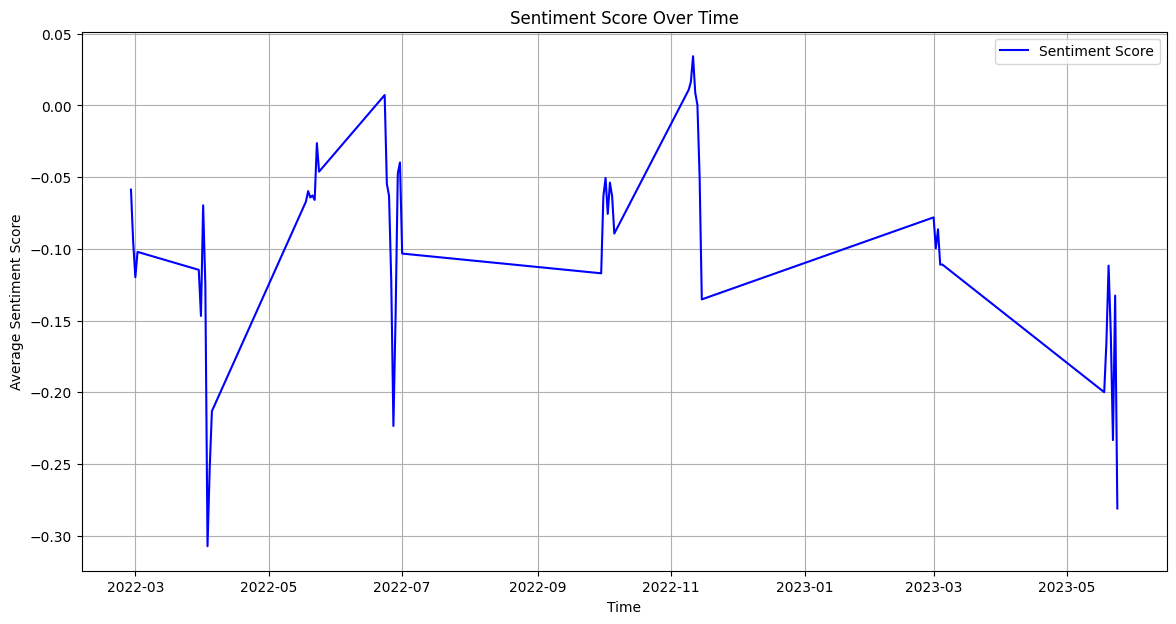

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = combined_df.copy()

df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'])

time_grouped_score = df.resample('D', on='tweetcreatedts')['sentiment_score'].mean()

time_grouped_label = (
    df.resample('D', on='tweetcreatedts')['sentiment_label']
    .value_counts()
    .unstack(fill_value=0)
)

time_grouped = pd.concat([time_grouped_score, time_grouped_label], axis=1)

print(time_grouped.head())

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_grouped, x=time_grouped.index, y='sentiment_score', label='Sentiment Score', color='blue')
plt.title("Sentiment Score Over Time")
plt.xlabel("Time")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.grid()
plt.show()

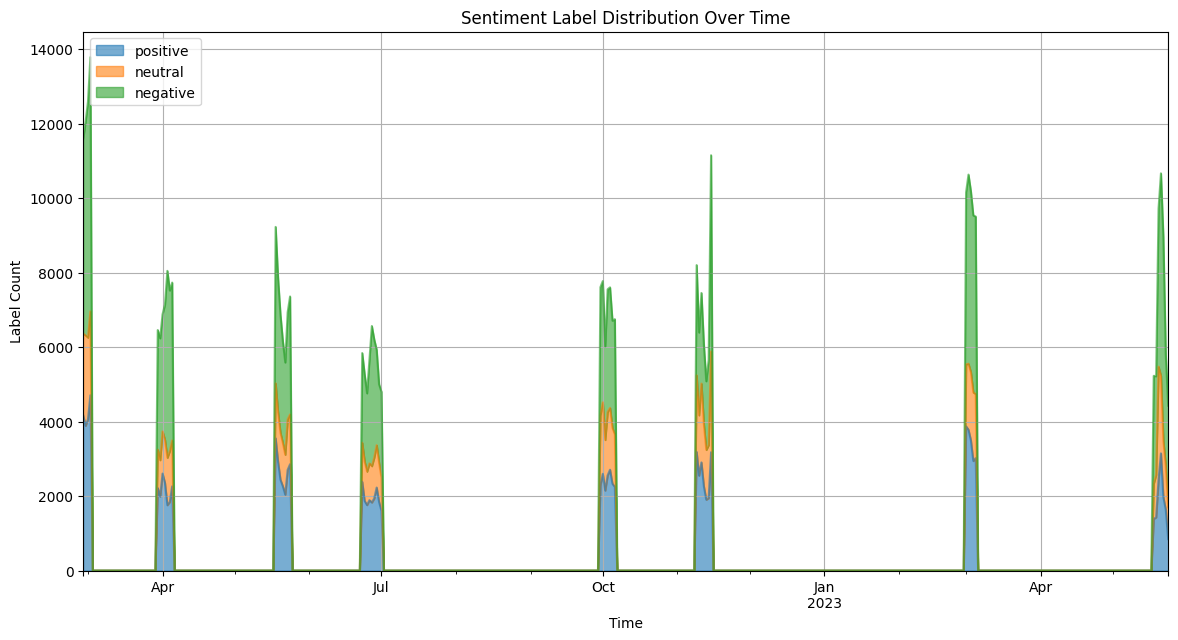

In [ ]:
time_grouped[['positive', 'neutral', 'negative']].plot(
    kind='area', stacked=True, figsize=(14, 7), alpha=0.6
)
plt.title("Sentiment Label Distribution Over Time")
plt.xlabel("Time")
plt.ylabel("Label Count")
plt.legend(loc="upper left")
plt.grid()
plt.show()

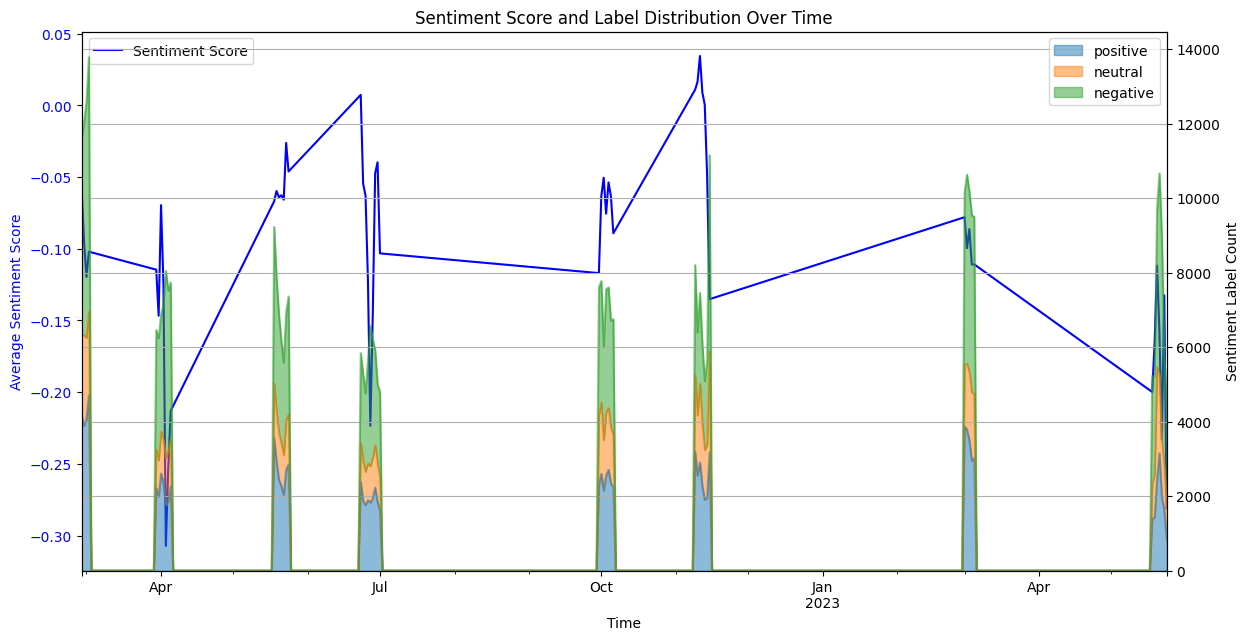

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(
    data=time_grouped,
    x=time_grouped.index,
    y="sentiment_score",
    ax=ax1,
    color="blue",
    label="Sentiment Score"
)
ax1.set_ylabel("Average Sentiment Score", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xlabel("Time")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
time_grouped[['positive', 'neutral', 'negative']].plot(
    kind='area',
    stacked=True,
    alpha=0.5,
    ax=ax2,
    # cmap="Pastel1"
)
ax2.set_ylabel("Sentiment Label Count")
ax2.tick_params(axis="y")
ax2.legend(loc="upper right")

plt.title("Sentiment Score and Label Distribution Over Time")
plt.grid()
plt.show()


<Figure size 1400x700 with 0 Axes>

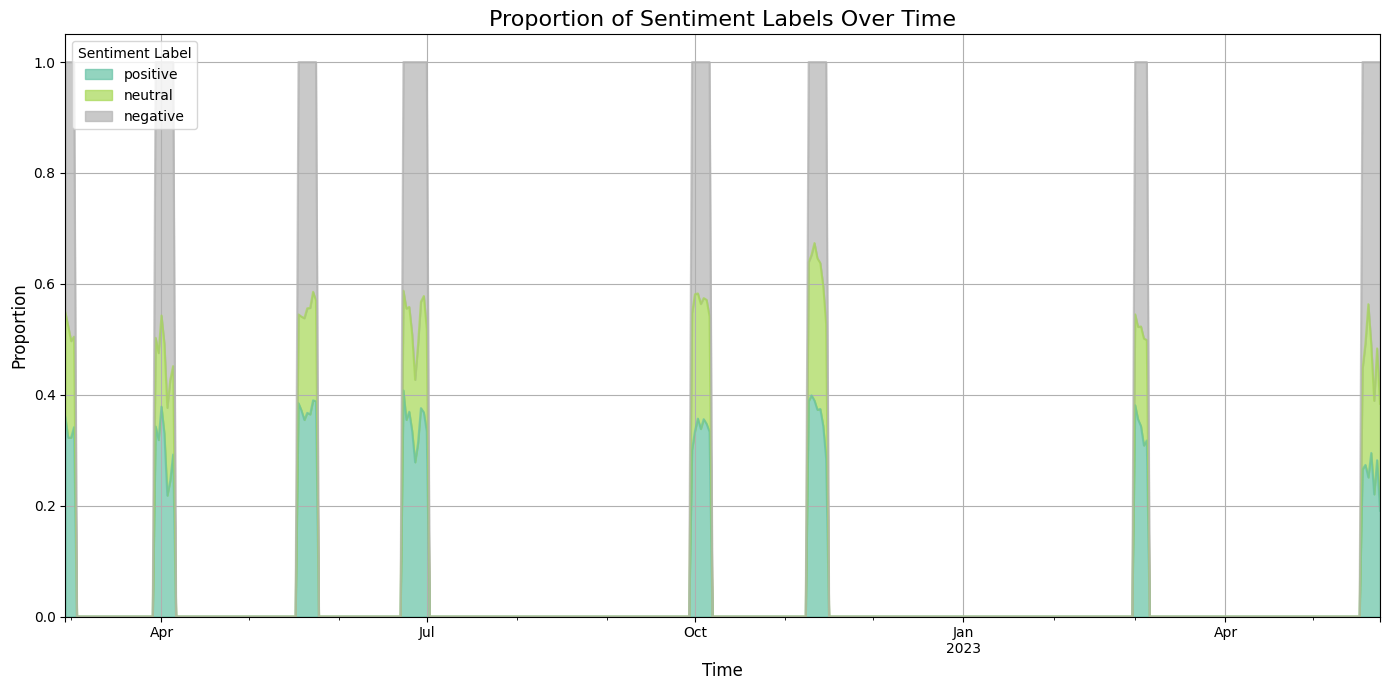

In [ ]:
time_grouped_percentage = time_grouped[['positive', 'neutral', 'negative']].div(
    time_grouped[['positive', 'neutral', 'negative']].sum(axis=1), axis=0
)

plt.figure(figsize=(14, 7))
time_grouped_percentage.plot(
    kind='area',
    stacked=True,
    figsize=(14, 7),
    alpha=0.7,
    cmap="Set2"
)

plt.title("Proportion of Sentiment Labels Over Time", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend(title="Sentiment Label", loc="upper left")
plt.grid()
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

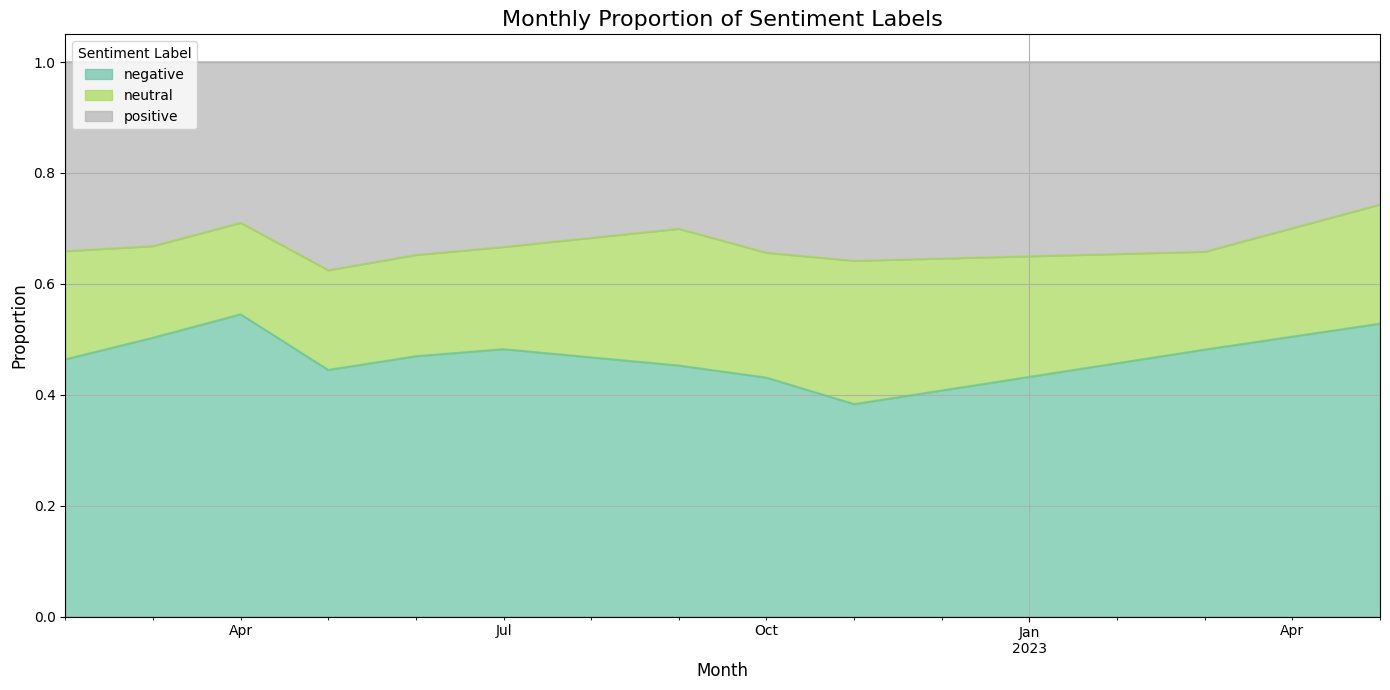

In [ ]:
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'])

monthly_grouped = (
    df.groupby(df['tweetcreatedts'].dt.to_period('M'))['sentiment_label']
    .value_counts()
    .unstack(fill_value=0)
)

monthly_percentage = monthly_grouped.div(monthly_grouped.sum(axis=1), axis=0)

plt.figure(figsize=(14, 7))
monthly_percentage.plot(
    kind='area',
    stacked=True,
    figsize=(14, 7),
    alpha=0.7,
    cmap="Set2"
)

plt.title("Monthly Proportion of Sentiment Labels", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend(title="Sentiment Label", loc="upper left")
plt.grid()
plt.tight_layout()
plt.show()